# Reverse Logistics

Here, I have included main features like Return Rate, Fraud Rate, Post Verification, Customer Classification.
Return Rate and Fraud Rate has been calculated using the respective formula by taking the values from the corresponding 
features.

1. Post Verification is classified as 'Fraudulent', 'Genuine', 'Fail to Return'
2. Fraudulent - even after the pre verification after picking up the return item, the item found to be fake
3. Genuine - item returned is the original one
4. Fail to return - one who hasn't completed the pre verification

Pre verification - Verification made like, uploading images of the item, sharing searial no. etc.

After all these steps Fraud Rate is calculated and set a threshold like,
1. Fraud Rate = 0, 'No Warning',
2. Fraud Rate > 0 & <= 15, 'Warning',
3. Fraud Rate > 15 & <= 40, 'Ban for Couple of Years',
4. Fraud Rate > 40, 'Ban Completely', this is mentioned in the last feature Customer Classification (target)

This is a solution which I expect to come, these ban policies should be provided by the Ecommerce/logistics companies.
                                                  


# Loading Data

In [74]:
# Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Load Data
data = pd.read_excel('Dummy Data updated.xlsx')
data

,Seller ID,Items Sold out count,Items Returned count,Sold Frequency,Customer ID,Items ID,Transaction ID,Items Type,Return Date,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints
0,100007,15,5,NaN,56943,1591,NaN,Clothing,NaN,Wrong Item,Completed,Accepted,Fraudulent,Bad Service
1,100008,5,2,NaN,56943,1628,NaN,Shoes and Footwear,NaN,Wrong Item,Completed,Accepted,Fraudulent,Bad Service
2,100009,10,3,NaN,11226,1628,NaN,Shoes and Footwear,NaN,Damage Piece,Completed,Accepted,Genuine,Good Service
3,100010,45,8,NaN,11226,1484,NaN,Bags Wallet Luggage,NaN,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied
4,100020,30,6,NaN,4760,1577,NaN,Electronic Gadgets,NaN,Not Working,Completed,Accepted,Genuine,Good Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,100847,61,5,NaN,7988,1415,NaN,Sports Fitness,NaN,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied
95,100848,68,3,NaN,7988,1760,NaN,Home Appliances,NaN,Not Working,Completed,Accepted,Fraudulent,Not Satisfied
96,100849,69,6,NaN,57098,1077,NaN,Healthcare Products,NaN,Wrong Item,Completed,Accepted,Genuine,Good Service
97,100850,62,3,NaN,57098,1415,NaN,Sports Fitness,NaN,Wrong Item,Completed,Accepted,Genuine,Good Service


# Feature Engineering

In [76]:
# Drop Unnecessary Features
data = data.drop(['Sold Frequency', 'Transaction ID', 'Return Date'],axis=1)
data.head()

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints
0,100007,15,5,56943,1591,Clothing,Wrong Item,Completed,Accepted,Fraudulent,Bad Service
1,100008,5,2,56943,1628,Shoes and Footwear,Wrong Item,Completed,Accepted,Fraudulent,Bad Service
2,100009,10,3,11226,1628,Shoes and Footwear,Damage Piece,Completed,Accepted,Genuine,Good Service
3,100010,45,8,11226,1484,Bags Wallet Luggage,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied
4,100020,30,6,4760,1577,Electronic Gadgets,Not Working,Completed,Accepted,Genuine,Good Service


In [77]:
data.columns

Index(['Seller ID', 'Items Sold out count', 'Items Returned count',
       'Customer ID', 'Items ID', 'Items Type', 'Return Reason',
       'Pre Verification', 'Return Request', 'Post Verification',
       'Customer Complaints'],
      dtype='object')

In [78]:
data.shape

(99, 11)

In [79]:
# Calculate Return Rate
data['Return Rate'] = (data['Items Returned count'] / data['Items Sold out count']) * 100

# Calculate Fraud Rate (adjust based on your criteria)
#data['Fraud Rate'] = (data['number_of_fraudulent_returns'] / data['total_number_of_returns']) * 100

In [80]:
data

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints,Return Rate
0,100007,15,5,56943,1591,Clothing,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,33.333333
1,100008,5,2,56943,1628,Shoes and Footwear,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,40.000000
2,100009,10,3,11226,1628,Shoes and Footwear,Damage Piece,Completed,Accepted,Genuine,Good Service,30.000000
3,100010,45,8,11226,1484,Bags Wallet Luggage,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,17.777778
4,100020,30,6,4760,1577,Electronic Gadgets,Not Working,Completed,Accepted,Genuine,Good Service,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
94,100847,61,5,7988,1415,Sports Fitness,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,8.196721
95,100848,68,3,7988,1760,Home Appliances,Not Working,Completed,Accepted,Fraudulent,Not Satisfied,4.411765
96,100849,69,6,57098,1077,Healthcare Products,Wrong Item,Completed,Accepted,Genuine,Good Service,8.695652
97,100850,62,3,57098,1415,Sports Fitness,Wrong Item,Completed,Accepted,Genuine,Good Service,4.838710


In [81]:
df = data.copy()

In [82]:
# Count the number of fraudulent returns for each customer, considering the count of items returned
fraudulent_returns_count = df[df['Post Verification'] == 'Fraudulent'].groupby('Customer ID')['Items Returned count'].sum().reset_index()
fraudulent_returns_count.columns = ['Customer ID', 'total_fraudulent_items_returned']

# Sum of total number of returns for each customer
total_returns_count = df.groupby('Customer ID')['Items Returned count'].sum().reset_index()
total_returns_count.columns = ['Customer ID', 'total_number_of_all_returns']  

# Merge the fraudulent and total returns counts with the original DataFrame
df = pd.merge(df, fraudulent_returns_count, on='Customer ID', how='left')
df = pd.merge(df, total_returns_count, on='Customer ID', how='left')

# Fill NaN values with 0 (customers without fraudulent returns)
df['total_fraudulent_items_returned'] = df['total_fraudulent_items_returned'].fillna(0)

# Calculate Fraud Rate
df['Fraud Rate'] = (df['total_fraudulent_items_returned'] / df['total_number_of_all_returns']) * 100


In [83]:
df

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints,Return Rate,total_fraudulent_items_returned,total_number_of_all_returns,Fraud Rate
0,100007,15,5,56943,1591,Clothing,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,33.333333,7.0,17,41.176471
1,100008,5,2,56943,1628,Shoes and Footwear,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,40.000000,7.0,17,41.176471
2,100009,10,3,11226,1628,Shoes and Footwear,Damage Piece,Completed,Accepted,Genuine,Good Service,30.000000,0.0,19,0.000000
3,100010,45,8,11226,1484,Bags Wallet Luggage,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,17.777778,0.0,19,0.000000
4,100020,30,6,4760,1577,Electronic Gadgets,Not Working,Completed,Accepted,Genuine,Good Service,20.000000,0.0,29,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,100847,61,5,7988,1415,Sports Fitness,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,8.196721,14.0,54,25.925926
95,100848,68,3,7988,1760,Home Appliances,Not Working,Completed,Accepted,Fraudulent,Not Satisfied,4.411765,14.0,54,25.925926
96,100849,69,6,57098,1077,Healthcare Products,Wrong Item,Completed,Accepted,Genuine,Good Service,8.695652,21.0,42,50.000000
97,100850,62,3,57098,1415,Sports Fitness,Wrong Item,Completed,Accepted,Genuine,Good Service,4.838710,21.0,42,50.000000


In [84]:
# Setting Threshold for customer classification
df['customer_classification'] = np.where(df['Fraud Rate'] == 0, 'No Warning',
                                         np.where((df['Fraud Rate'] > 0) & (df['Fraud Rate'] <= 15), 'Warning',
                                                  np.where((df['Fraud Rate'] > 15) & (df['Fraud Rate'] <= 40), 'Ban for Couple of Years',
                                                           'Ban Completely')))

In [85]:
df

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints,Return Rate,total_fraudulent_items_returned,total_number_of_all_returns,Fraud Rate,customer_classification
0,100007,15,5,56943,1591,Clothing,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,33.333333,7.0,17,41.176471,Ban Completely
1,100008,5,2,56943,1628,Shoes and Footwear,Wrong Item,Completed,Accepted,Fraudulent,Bad Service,40.000000,7.0,17,41.176471,Ban Completely
2,100009,10,3,11226,1628,Shoes and Footwear,Damage Piece,Completed,Accepted,Genuine,Good Service,30.000000,0.0,19,0.000000,No Warning
3,100010,45,8,11226,1484,Bags Wallet Luggage,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,17.777778,0.0,19,0.000000,No Warning
4,100020,30,6,4760,1577,Electronic Gadgets,Not Working,Completed,Accepted,Genuine,Good Service,20.000000,0.0,29,0.000000,No Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,100847,61,5,7988,1415,Sports Fitness,Wrong Item,Pending,Not Accepted,Fail to return,Not Satisfied,8.196721,14.0,54,25.925926,Ban for Couple of Years
95,100848,68,3,7988,1760,Home Appliances,Not Working,Completed,Accepted,Fraudulent,Not Satisfied,4.411765,14.0,54,25.925926,Ban for Couple of Years
96,100849,69,6,57098,1077,Healthcare Products,Wrong Item,Completed,Accepted,Genuine,Good Service,8.695652,21.0,42,50.000000,Ban Completely
97,100850,62,3,57098,1415,Sports Fitness,Wrong Item,Completed,Accepted,Genuine,Good Service,4.838710,21.0,42,50.000000,Ban Completely


In [86]:
# Save the DataFrame to a CSV file 
#df.to_csv('C:/Users/SONY/Downloads/Python/dummy data review.csv', index=False)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Seller ID                        99 non-null     int64  
 1   Items Sold out count             99 non-null     int64  
 2   Items Returned count             99 non-null     int64  
 3   Customer ID                      99 non-null     int64  
 4   Items ID                         99 non-null     int64  
 5   Items Type                       99 non-null     object 
 6   Return Reason                    99 non-null     object 
 7   Pre Verification                 99 non-null     object 
 8   Return Request                   99 non-null     object 
 9   Post Verification                99 non-null     object 
 10  Customer Complaints              99 non-null     object 
 11  Return Rate                      99 non-null     float64
 12  total_fraudulent_items_r

In [88]:
# Check for Missing value
df.isna().sum()

Seller ID                          0
Items Sold out count               0
Items Returned count               0
Customer ID                        0
Items ID                           0
Items Type                         0
Return Reason                      0
Pre Verification                   0
Return Request                     0
Post Verification                  0
Customer Complaints                0
Return Rate                        0
total_fraudulent_items_returned    0
total_number_of_all_returns        0
Fraud Rate                         0
customer_classification            0
dtype: int64

# Label Encoding

In [89]:
# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Items Type']= label_encoder.fit_transform(df['Items Type'])
df['Items Type'].unique()

df['Return Reason']= label_encoder.fit_transform(df['Return Reason'])
df['Return Reason'].unique()

df['Pre Verification']= label_encoder.fit_transform(df['Pre Verification'])
df['Pre Verification'].unique()

df['Return Request']= label_encoder.fit_transform(df['Return Request'])
df['Return Request'].unique()

df['Post Verification']= label_encoder.fit_transform(df['Post Verification'])
df['Post Verification'].unique()

df['Customer Complaints']= label_encoder.fit_transform(df['Customer Complaints'])
df['Customer Complaints'].unique()

array([0, 1, 2])

In [90]:
df.head()

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Customer Complaints,Return Rate,total_fraudulent_items_returned,total_number_of_all_returns,Fraud Rate,customer_classification
0,100007,15,5,56943,1591,2,2,0,0,1,0,33.333333,7.0,17,41.176471,Ban Completely
1,100008,5,2,56943,1628,8,2,0,0,1,0,40.000000,7.0,17,41.176471,Ban Completely
2,100009,10,3,11226,1628,8,0,0,0,2,1,30.000000,0.0,19,0.000000,No Warning
3,100010,45,8,11226,1484,0,2,1,1,0,2,17.777778,0.0,19,0.000000,No Warning
4,100020,30,6,4760,1577,3,1,0,0,2,1,20.000000,0.0,29,0.000000,No Warning


# Model Building

In [91]:
# Extract X and Y
X = df.drop(['customer_classification'], axis=1)
Y = df['customer_classification']

In [92]:
# Splitting the dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

# Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.95
Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95


C:\Users\SONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


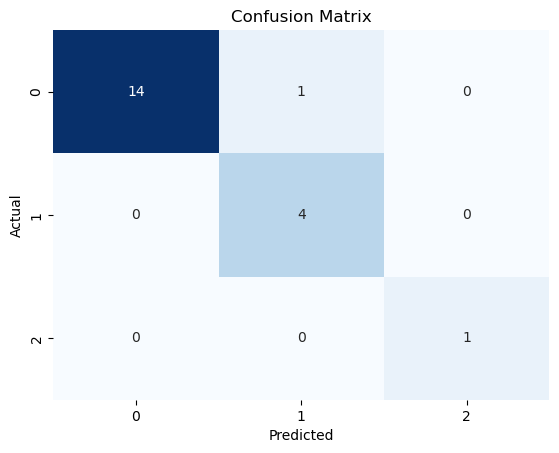

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are your actual and predicted labels
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
confusion_matrix(Y_test, Y_pred)

array([[14,  1,  0],
       [ 0,  4,  0],
       [ 0,  0,  1]], dtype=int64)

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier 
acc_values = []
neighbors = np.arange(2,50)
for K in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=K, metric='minkowski')
    classifier.fit(X_train, Y_train)
    Y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test, Y_pred)
    acc_values.append(acc)

In [97]:
acc_values

[0.95,
 0.9,
 0.95,
 0.95,
 0.95,
 0.95,
 1.0,
 0.95,
 0.95,
 0.85,
 0.9,
 0.9,
 0.85,
 0.85,
 0.85,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]

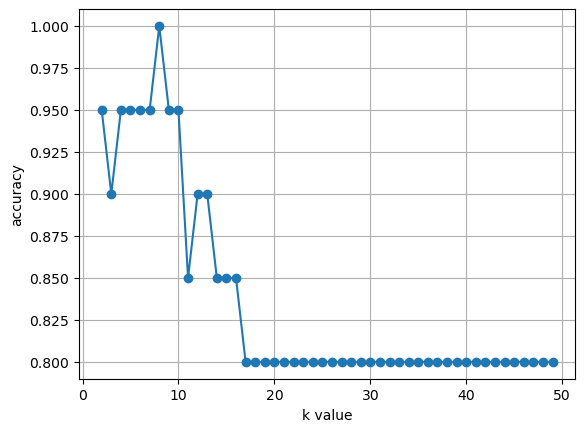

In [98]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [99]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.95
Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95


In [100]:
confusion_matrix(Y_test, Y_pred)

array([[14,  0,  1],
       [ 0,  4,  0],
       [ 0,  0,  1]], dtype=int64)

# Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
Bayes_Gauss = GaussianNB()
Bayes_Gauss.fit(X_train, Y_train)
Y_pred = Bayes_Gauss.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.9
Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90


In [102]:
confusion_matrix(Y_test, Y_pred)

array([[13,  2,  0],
       [ 0,  4,  0],
       [ 0,  0,  1]], dtype=int64)

In [103]:
Y_test.value_counts()

Ban Completely             15
Ban for Couple of Years     4
No Warning                  1
Name: customer_classification, dtype: int64

# Data Visualization

# Customer Complaints

In [108]:
# Drop the 'Customer Complaints' column
df = df.drop('Customer Complaints', axis=1)

In [106]:
# Assuming 'return_rate' is the calculated return rate for each customer
df['customer_complaints'] = pd.cut(df['Return Rate'], 
                                   bins=[-1, 20, 50, 80, 100, float('inf')],
                                   labels=['Much more satisfied', 'Getting wrong color and sizes', 'Wrong items delivered', 'Always gets wrong item and poor quality products as well', 'Extremely poor quality products'],
                                   right=False)

# Print the updated DataFrame
print(df[['Return Rate', 'customer_complaints']])


    Return Rate            customer_complaints
0     33.333333  Getting wrong color and sizes
1     40.000000  Getting wrong color and sizes
2     30.000000  Getting wrong color and sizes
3     17.777778            Much more satisfied
4     20.000000  Getting wrong color and sizes
..          ...                            ...
94     8.196721            Much more satisfied
95     4.411765            Much more satisfied
96     8.695652            Much more satisfied
97     4.838710            Much more satisfied
98    10.638298            Much more satisfied

[99 rows x 2 columns]


In [110]:
df.head()

,Seller ID,Items Sold out count,Items Returned count,Customer ID,Items ID,Items Type,Return Reason,Pre Verification,Return Request,Post Verification,Return Rate,total_fraudulent_items_returned,total_number_of_all_returns,Fraud Rate,customer_classification,customer_complaints
0,100007,15,5,56943,1591,2,2,0,0,1,33.333333,7.0,17,41.176471,Ban Completely,Getting wrong color and sizes
1,100008,5,2,56943,1628,8,2,0,0,1,40.000000,7.0,17,41.176471,Ban Completely,Getting wrong color and sizes
2,100009,10,3,11226,1628,8,0,0,0,2,30.000000,0.0,19,0.000000,No Warning,Getting wrong color and sizes
3,100010,45,8,11226,1484,0,2,1,1,0,17.777778,0.0,19,0.000000,No Warning,Much more satisfied
4,100020,30,6,4760,1577,3,1,0,0,2,20.000000,0.0,29,0.000000,No Warning,Getting wrong color and sizes


# Heat Map

C:\Users\SONY\AppData\Local\Temp\ipykernel_9184\2485535948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'Seller ID'),
  Text(1.5, 0, 'Items Sold out count'),
  Text(2.5, 0, 'Items Returned count'),
  Text(3.5, 0, 'Customer ID'),
  Text(4.5, 0, 'Items ID'),
  Text(5.5, 0, 'Items Type'),
  Text(6.5, 0, 'Return Reason'),
  Text(7.5, 0, 'Pre Verification'),
  Text(8.5, 0, 'Return Request'),
  Text(9.5, 0, 'Post Verification'),
  Text(10.5, 0, 'Customer Complaints'),
  Text(11.5, 0, 'Return Rate'),
  Text(12.5, 0, 'total_fraudulent_items_returned'),
  Text(13.5, 0, 'total_number_of_all_returns'),
  Text(14.5, 0, 'Fraud Rate')])

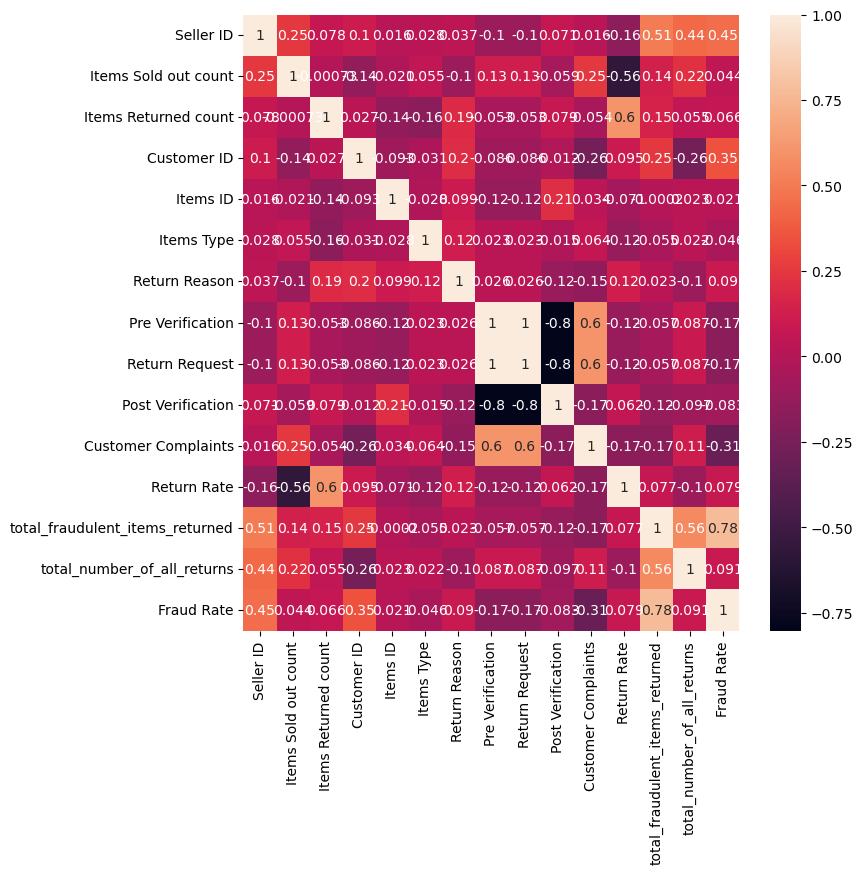

In [104]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 90)

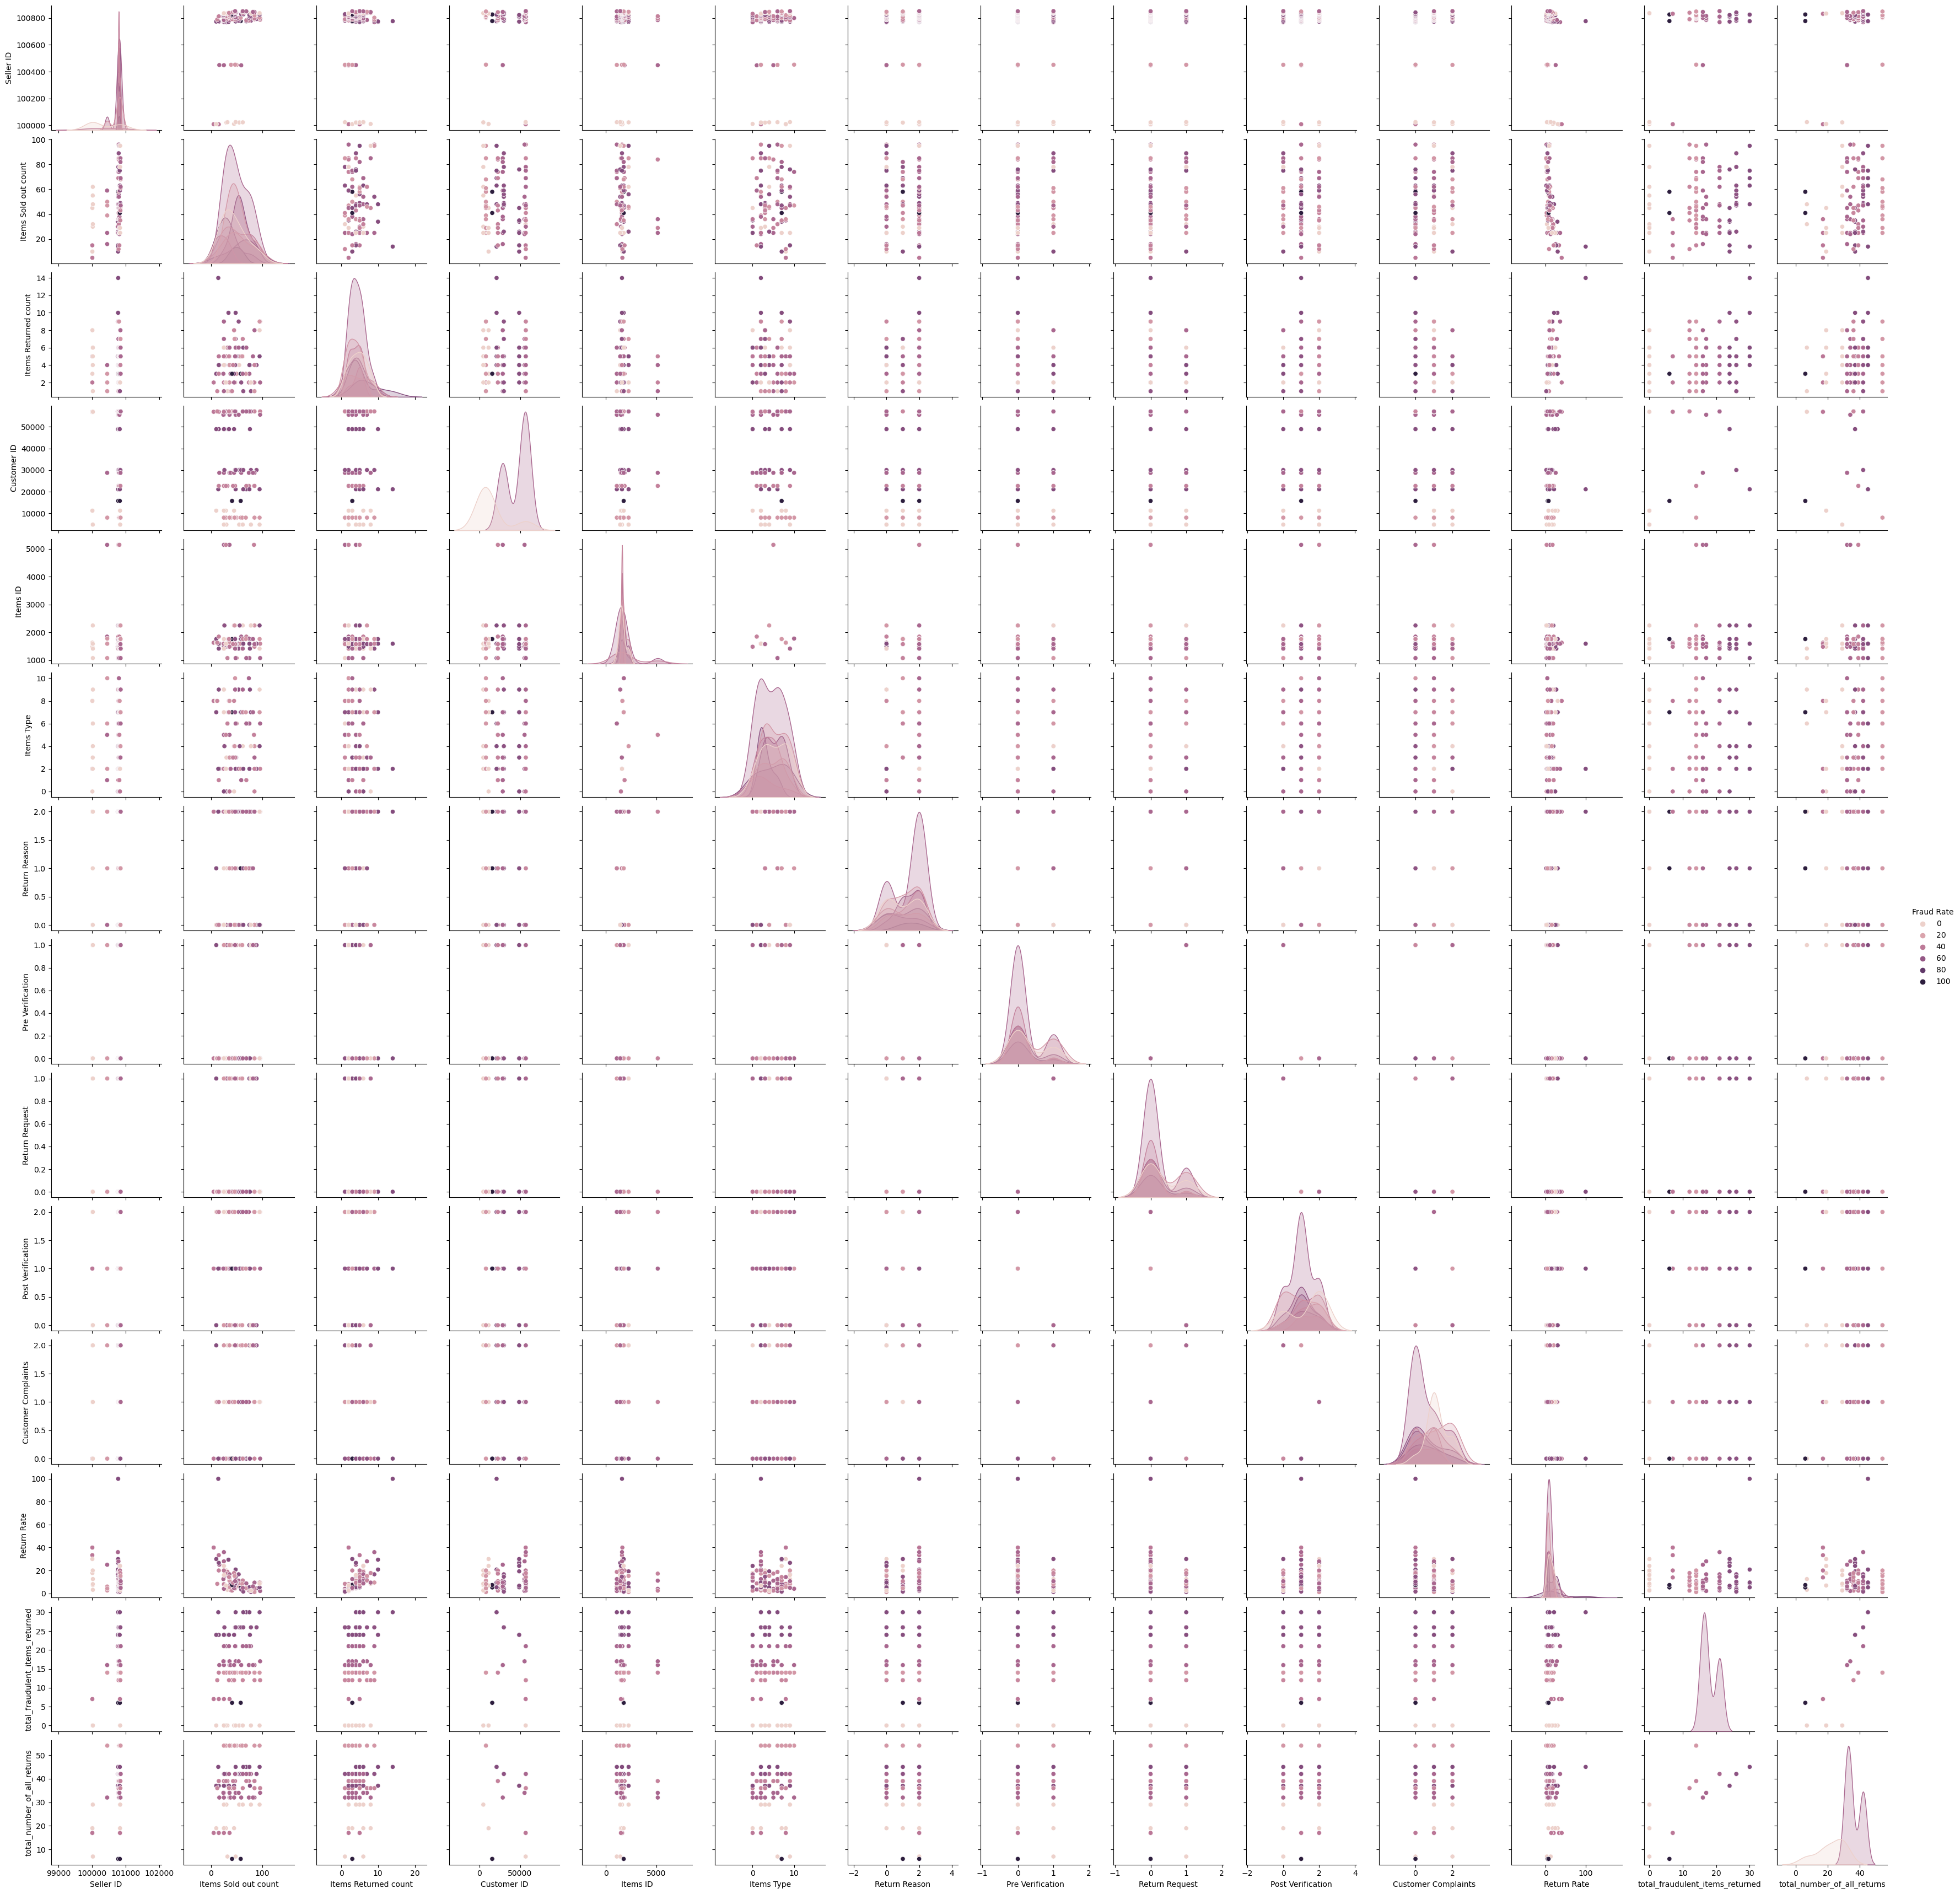

In [105]:
sns.pairplot(data=df, hue= "Fraud Rate")